# Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Необходимо выяснить какие факторы влияют на зарплату специалиста Data Scientist.
А также ответить на ключевые вопросы HR-агентства:
1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

# Импорт библиотек

In [203]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# 1 Загрузка и обработка данных

## Загрузка данных

In [204]:
data = pd.read_csv('./data/ds_salaries.csv', index_col=0)

display(data)
display(data.info())


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


None

## Проверка датасета

In [205]:
#Подсчет пропусков
print("Пропуски")
display(data.isnull().sum())

#Удаление дубликатов
print('Очистка от дубликатов')
data.drop_duplicates(keep='first', inplace=True)
display(data.info())


Пропуски


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Очистка от дубликатов
<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


None

### Промежуточные выводы
Данные не содержат пропуски, однако были обнаружены повтояющеися строки. Дубликаты удалены.

Типы столбцов корректные, на этапе определения категориальных признаков можно преобразовать их в тип 'category', для уменьшения занимаемого объема памяти.

## Неинформативные признаки

Возможно в данной задаче неинформативными признаками могут быть 'salary' и 'salary_currency' т. к. есть столбец с заплатой в доллрах, величины которого сравнимы между собой.

## Классификация признаков

**Числовые:**

salary

**Категориальные:**

work_year

experience_level

job_title

employee_residence

remote_ratio - признак отнесен к категориальному, т. к. принимает всего 3 значения. Если бы доля удаленнй работы измерялай в процентах, то признак следовабыло отнести к числовому.

company_location

company_size

In [206]:
columns_category = ['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employment_type']
data[columns_category] = data[columns_category].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    category
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_title           565 non-null    category
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    object  
 6   salary_in_usd       565 non-null    int64   
 7   employee_residence  565 non-null    category
 8   remote_ratio        565 non-null    category
 9   company_location    565 non-null    category
 10  company_size        565 non-null    category
dtypes: category(8), int64(2), object(1)
memory usage: 30.2+ KB


## Статистические характеристики признаков

In [207]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.0,565,565,565,5.650000e+02,565,565.000000,565,565.0,565,565
unique,3.0,4,4,50,NaN,17,NaN,57,3.0,50,3
top,2022.0,SE,FT,Data Scientist,NaN,USD,NaN,US,100.0,US,M
freq,278.0,243,546,130,NaN,359,NaN,295,346.0,318,290
mean,NaN,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,NaN,NaN,NaN


В таблице выше приведены основные статистические характиристики для категорильных и численного признака в датасете. Для категориальных это количество уникальных значений, самое распостраненное значение и сколько раз оно встречается в датасете. Для численного признака это мат. ожидпние, стандартное отклонение и все квартили.

# 2.1 Визуальный анализ данных

## Базовый анализ признаков

/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_1001/2012016497.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig01.show()


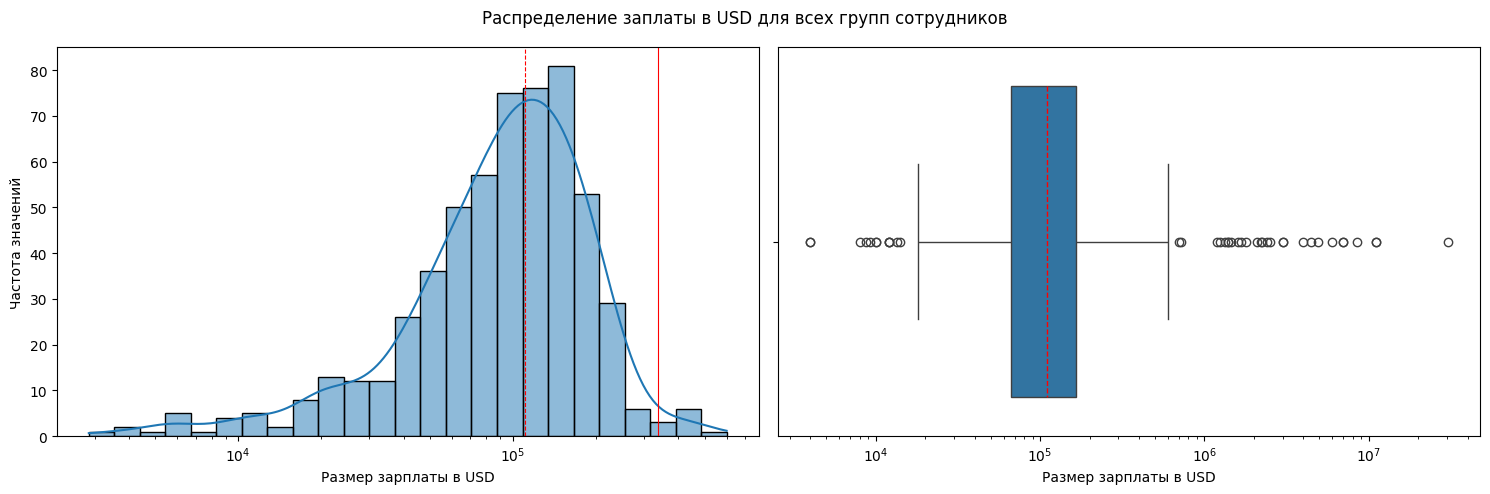

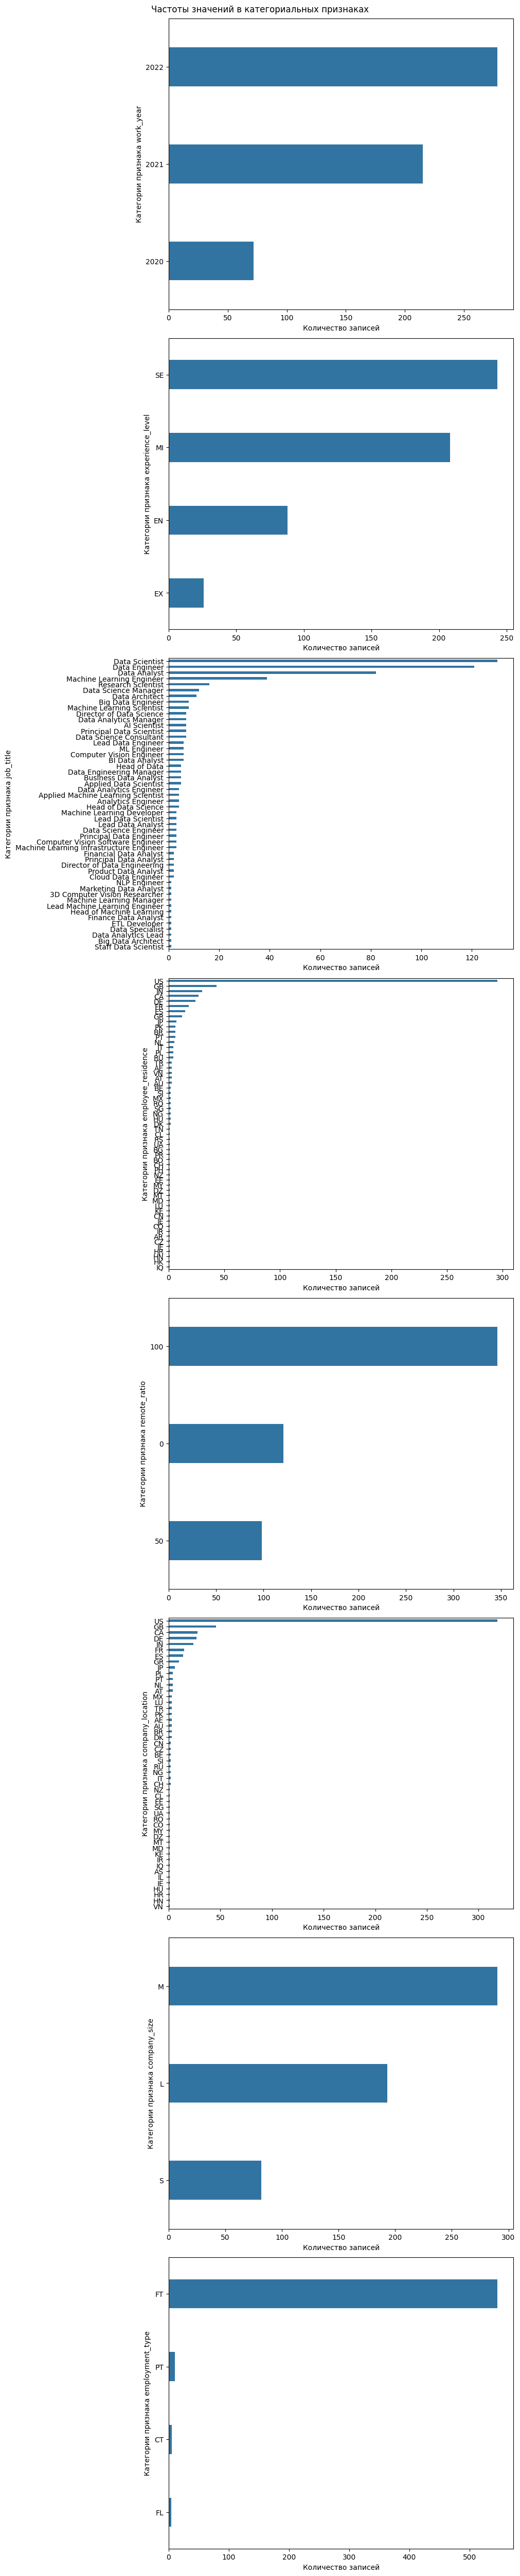

In [208]:
#Числовые признаки
fig01, axes = plt.subplots(1, 2, figsize=(15, 5))
fig01.suptitle('Распределение заплаты в USD для всех групп сотрудников')

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0], log_scale=True)
axes[0].set(xlabel='Размер зарплаты в USD', ylabel='Частота значений')
axes[0].axvline(data['salary'].mean(), color='red', linestyle='-', linewidth=0.8)
axes[0].axvline(data['salary'].median(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'}, log_scale=True)
axes[1].set(xlabel='Размер зарплаты в USD')
fig01.show()

#Категориальные признаки
fig02, axes02 = plt.subplots(len(columns_category), 1, figsize=(10, 50), constrained_layout = True)
fig02.suptitle('Частоты значений в категориальных признаках')

for i, column in enumerate(columns_category):
    sns.countplot(data, y=column, order=list(data[column].value_counts().index), ax=axes02[i], orient='v', width=0.4)
    axes02[i].set(ylabel=f'Категории признака {column}', xlabel='Количество записей')

## Влияние признаков на зарплату по всем должностям

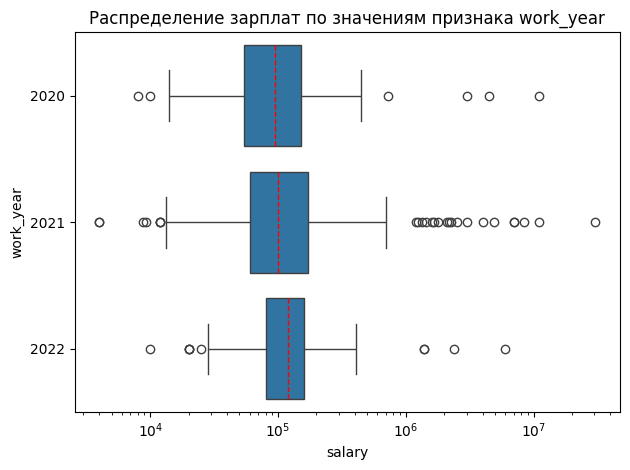

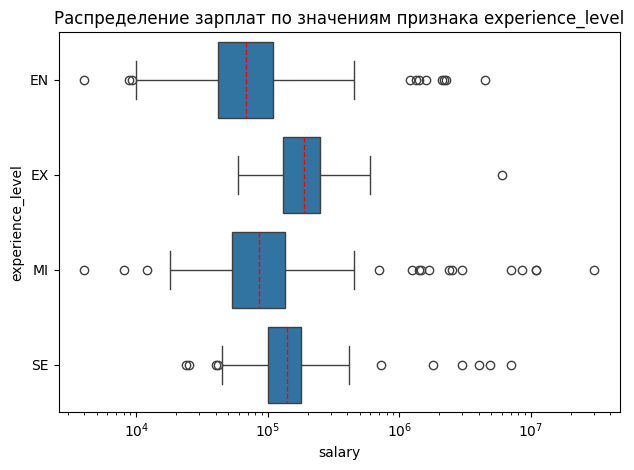

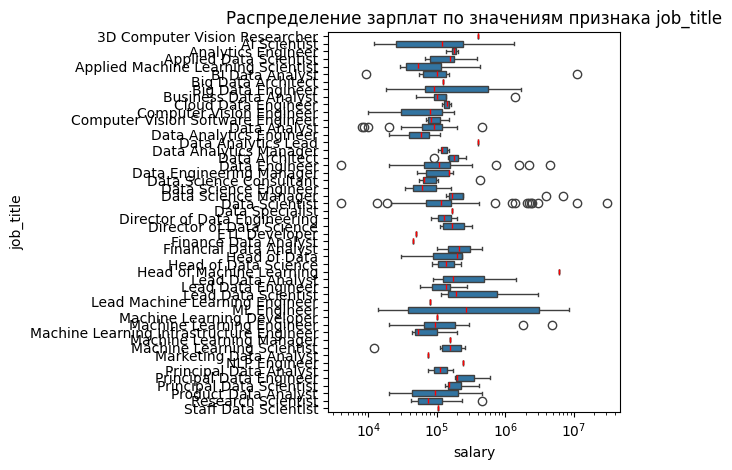

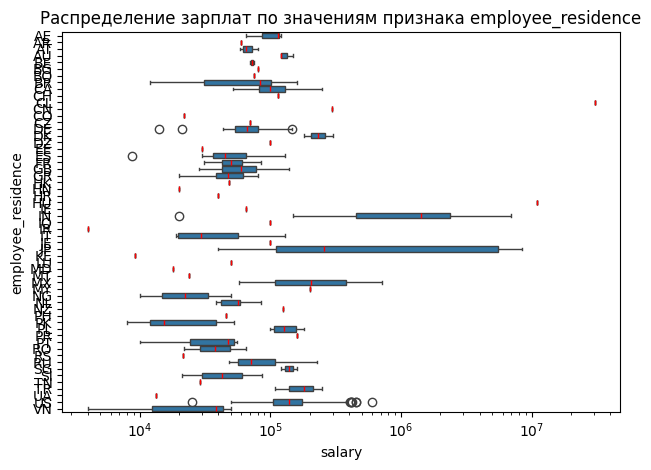

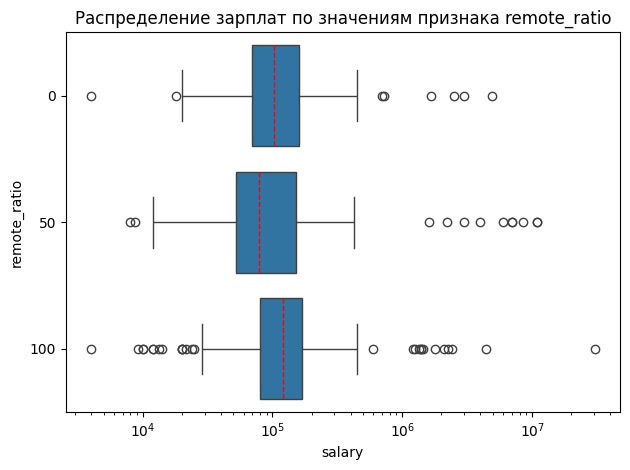

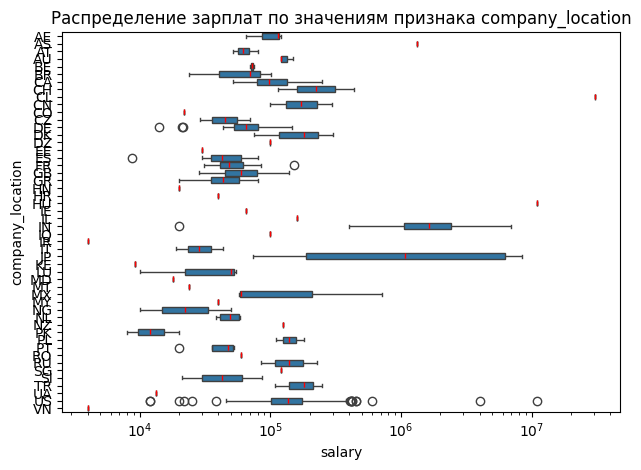

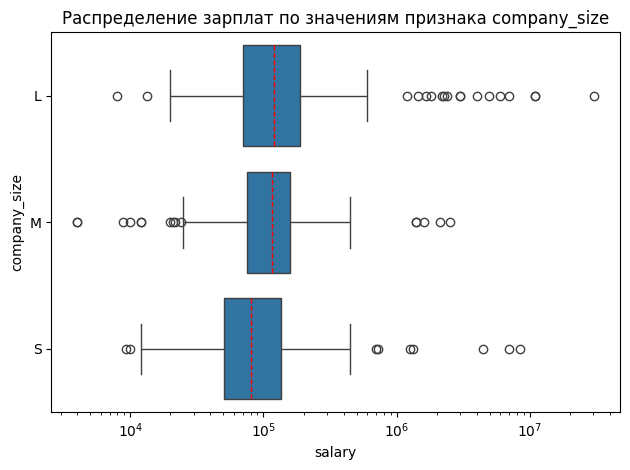

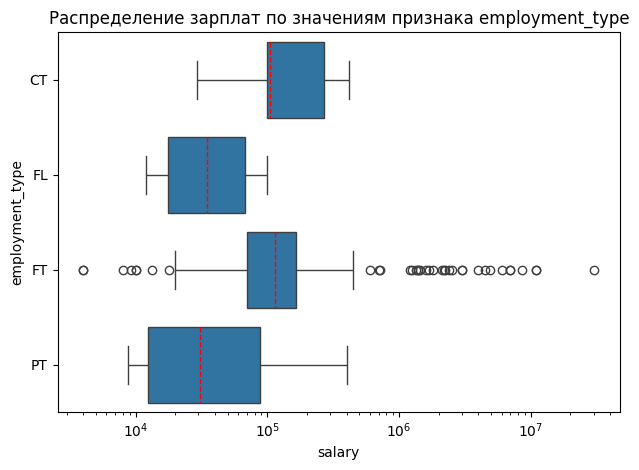

In [209]:
colums = columns_category.copy()
colums.remove('job_title')
for column in columns_category:
    ax = sns.boxplot(data, x='salary', y=column, orient='h', log_scale=True, medianprops={'color': 'red', 'linestyle': '--'})
    plt.title(f'Распределение зарплат по значениям признака {column}')
    plt.show()

## Промежуточные выводы
Распределение зарплат в датасете не является нормальным. При использовании логарифмической шкалы, распределение становится более похожим на нормальное, но все равно заметна ассиметрия относительно медианы.

По коробчатым диаграммам наиболее сильное заметно вляние за зарплату у признаков
- **experience_level**
- **job_title**
- **employee_residence**
- **company_location**
- **employment_type**

Не сильно видна зависимость зарплаты от признаков
- **work_year**
- **remote_ratio**
- **company_size**

# 2.2 Статистический анализ данных

In [210]:
alpha = 0.05

def print_result(p, alpha):

    print(f'p-value={round(p, 3)}, alpha={alpha}')
    if p <= alpha:
        print('Принимается альтернативная гипотеза')
    else:
        print('Принимается нулевая гипотеза')

## Проверка распределения зарплат

Визуально было сделано предположение что зарплаты в отрасли не имеют нормального распределения. Проверим это на основе нашей выборки:

Для проверки на нормальность будем использовать тест Шапиро-Уилка.

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [211]:
_, p = stats.shapiro(data['salary'])
print_result(p, alpha)

p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза


## Ежегоднай рост зарплат

Визуально было сделано предположение что зарплаты в отрасли незначительно изменялись на протяжении 3 лет. Проверим это:

$H_0$ - медианы зарплат в разные года не отличаются

$H_a$ - медианы заплат в разные года отличаются

Уровень значимости  - 0.05

### Проверка на нормальность в группах

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [212]:
group_1 = data[data['work_year']==2020]['salary']
group_2 = data[data['work_year']==2021]['salary']
group_3 = data[data['work_year']==2022]['salary']

_, p = stats.shapiro(group_1)
print('Для 2020 года')
print_result(p, alpha)

_, p = stats.shapiro(group_2)
print('Для 2021 года')
print_result(p, alpha)

_, p = stats.shapiro(group_3)
print('Для 2022 года')
print_result(p, alpha)

Для 2020 года
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для 2021 года
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для 2022 года
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза


### Выбор теста для сравнения групп

Проверяем 3 группы данных

Группы независимы

Данные в группах распределны не нормально

Для проверки гипотез применим тест Краскела-Уоллиса

In [213]:
_, p = stats.kruskal(group_1, group_2, group_3)

print('Для проверки различий в группах')
print_result(p, alpha)

Для проверки различий в группах
p-value=0.101, alpha=0.05
Принимается нулевая гипотеза


### Промежуточные выводы

Нет оснований утверждать что наблюдается ежегодый рост зарплат.

## Зарплаты Data Scientist и Data Engineer в 2022 году

$H_0$ - медианы заплат Data Scientist и Data Engineer в 2022 году не отличаются

$H_a$ - медианы заплат Data Scientist и Data Engineer в 2022 году отличаются

Уровень значимости  - 0.05

### Проверка на нормальность в группах

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [214]:
group_1 = data[(data['work_year']==2022) & (data['job_title']=='Data Scientist')]['salary']
group_2 = data[(data['work_year']==2022) & (data['job_title']=='Data Engineer')]['salary']

_, p = stats.shapiro(group_1)
print('Для Data Scientist')
print_result(p, alpha)

_, p = stats.shapiro(group_2)
print('Для Data Engineer')
print_result(p, alpha)


Для Data Scientist
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для Data Engineer
p-value=0.004, alpha=0.05
Принимается альтернативная гипотеза


### Выбор теста для сравнения групп

Сравниваем 2 группы данных

Группы независимы

Данные в группах распределны не нормально

Для проверки гипотез применим критерий Манна-Уитни

In [215]:
_, p = stats.mannwhitneyu(group_1, group_2)

print('Для проверки различий в группах')
print_result(p, alpha)

Для проверки различий в группах
p-value=0.051, alpha=0.05
Принимается нулевая гипотеза


### Промежуточные выводы

Нет оснований утверждать что в 2022 году есть различия в заплате у специалистов Data Scientist и Data Engineer.

## Зарплаты специалистов Data Scientist в компаниях различных размеров

$H_0$ - медианы заплат специалистов Data Scientist не отличаются в компаниях разных рамеров 

$H_a$ - медианы заплат специалистов Data Scientist отличаются в компаниях разных рамеров

Уровень значимости  - 0.05

### Проверка на нормальность в группах

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [216]:
group_1 = data[(data['job_title']=='Data Scientist') & (data['company_size']=='S')]['salary']
group_2 = data[(data['job_title']=='Data Scientist') & (data['company_size']=='M')]['salary']
group_3 = data[(data['job_title']=='Data Scientist') & (data['company_size']=='L')]['salary']

_, p = stats.shapiro(group_1)
print('Для Data Scientist в компаниях S')
print_result(p, alpha)

_, p = stats.shapiro(group_2)
print('Для Data Scientist в компаниях M')
print_result(p, alpha)

_, p = stats.shapiro(group_3)
print('Для Data Scientist в компаниях L')
print_result(p, alpha)

Для Data Scientist в компаниях S
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для Data Scientist в компаниях M
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для Data Scientist в компаниях L
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза


### Выбор теста для сравнения групп

Проверяем 3 группы данных

Группы независимы

Данные в группах распределны не нормально

Для проверки гипотез применим тест Краскела-Уоллиса

In [217]:
_, p = stats.kruskal(group_1, group_2, group_3)

print('Для проверки различий в группах')
print_result(p, alpha)

Для проверки различий в группах
p-value=0.012, alpha=0.05
Принимается альтернативная гипотеза


### Промежуточные выводы

Медианная зарплата у специалистов Data Scientist зависит от размера компании.

## Связь между наличием должностей Data Scientist и Data Engineer и размером компании

$H_0$ - наличие в штате специалиста Data Scientist или Data Engineer и размер компании не связаны

$H_a$ - наличие в штате специалиста Data Scientist или Data Engineer и размер компании взаимосвязаны

Уровень значимости  - 0.05

### Выбор теста для анализа признаков

Проверяем 2 признака одной выборки

Признаки категориальные

Для проверки гипотез применим тест хи-квадрат

In [218]:
data02 = data[['company_size', 'job_title']]
data02['ds_de_flag'] = data02.loc[:, 'job_title'].apply(lambda x: True if (x=='Data Scientist' or x=='Data Engineer') else False)
data02.drop(columns='job_title', inplace=True)

table = pd.crosstab(data02['company_size'], data02['ds_de_flag'])
_, p, _, _ = stats.chi2_contingency(table)

print('Для проверки взаимосвязи между признаками')
print_result(p, alpha)

Для проверки взаимосвязи между признаками
p-value=0.005, alpha=0.05
Принимается альтернативная гипотеза


/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_1001/1270159532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data02['ds_de_flag'] = data02.loc[:, 'job_title'].apply(lambda x: True if (x=='Data Scientist' or x=='Data Engineer') else False)
/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_1001/1270159532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data02.drop(columns='job_title', inplace=True)


### Промежуточные выводы

Есть основания утрвержать что есть связь между наличием в компании специалиста Data Scientist и Data Engineer и размером компании.

# 3 Выводы

## Общее распределение зарплат
Не является нормальным. Для большей наглядности визуального анализа удобнее представлять с использованием логарифмической шкалы. 

## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

При графическом анализе зарплат в сфере Data Science, в выборке можно заметить незначительные отличия в распределениях в разные годы: увеличивается медиана, ументшается межквартильный размах. Однако статистические тесты показывают что нет статистически значимых отличий в заплатах в разные года и следовательно нельзя говорить о том что медиана заработной платы меняется.

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

На основе статистический тестов нет оснований утверждать что есть различия в заплатах у специалистов Data Scientist и Data Engineer в 2022 году

## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

При графическом анализе зависимости заплат размера команий заметны различия для компаний малых размеров. У средних и больших компаний медианы и межквартильные расстояния практически не отличаются. Статистический анализ подтверждает этот вывод. Поскользу p-value меньше уровня значимости, есть основания утверждать что есть различия в зарплатах в компаниях разних размеров.

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Статистический анализ показывает что существует взаимосвязь между тем есть ли в штате специалист Data Scientist или Data Engineer и размером компании.

# 4 Дополнительное исследование

## Влияние типов наймов PT и FT на зарплату

$H_0$ - медианы заплат у сотрудников с разным типом трудоустройства не отличаются

$H_a$ - медианы заплат у сотрудников с разным типом трудоустройства различны

Уровень значимости  - 0.05

### Проверка на нормальность в группах

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [219]:
group_1 = data[data['employment_type']=='PT']['salary']
group_2 = data[data['employment_type']=='FT']['salary']

_, p = stats.shapiro(group_1)
print('Для типа найма PT')
print_result(p, alpha)

_, p = stats.shapiro(group_2)
print('Для типа найма FT')
print_result(p, alpha)

Для типа найма PT
p-value=0.001, alpha=0.05
Принимается альтернативная гипотеза
Для типа найма FT
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза


### Выбор теста для сравнения групп

Проверяем 2 группы данных

Группы независимы

Данные в 2-х группах данные распределны не нормально

Для проверки гипотез применим критерий Манна-Уитни

In [220]:
_, p = stats.mannwhitneyu(group_1, group_2)

print('Для проверки различий в группах')
print_result(p, alpha)

Для проверки различий в группах
p-value=0.007, alpha=0.05
Принимается альтернативная гипотеза


### Вывод по исследованию

Визуальный и статистический анализ позволяет утверждать что есть различия в зарплате у сотрудников с форматом трудоустройства на полный или частичный день. 

## Влияние признака remote_ratio на зарплату

$H_0$ - медианы заплат у сотрудников с разным форматом работы не отличаются

$H_a$ - медианы заплат у сотрудников с разным форматом работы отличаются

Уровень значимости  - 0.05

### Проверка на нормальность в группах

$H_0$ - данные распределены нормально

$H_a$ - Данные распределены не нормально

Уровень значимости  - 0.05

In [221]:
group_1 = data[data['remote_ratio']==0]['salary']
group_2 = data[data['remote_ratio']==50]['salary']
group_3 = data[data['remote_ratio']==100]['salary']


_, p = stats.shapiro(group_1)
print('Для формата удаленной работы 0')
print_result(p, alpha)

_, p = stats.shapiro(group_2)
print('Для формата удаленной работы 50')
print_result(p, alpha)

_, p = stats.shapiro(group_3)
print('Для формата удаленной работы 100')
print_result(p, alpha)

Для формата удаленной работы 0
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для формата удаленной работы 50
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза
Для формата удаленной работы 100
p-value=0.0, alpha=0.05
Принимается альтернативная гипотеза


### Выбор теста для сравнения групп

Проверяем 3 группы данных

Группы независимы

Данные в группах распределны не нормально

Для проверки гипотез применим тест Краскела-Уоллиса

In [222]:
_, p = stats.kruskal(group_1, group_2, group_3)

print('Для проверки различий в группах')
print_result(p, alpha)

Для проверки различий в группах
p-value=0.006, alpha=0.05
Принимается альтернативная гипотеза


### Вывод по исследованию

Визуальный анализ показывает что емуются различия в заплатах специалистов с разными формами трудоустройства. Статистический анализ подтверждает это наблюдение: медианы заплат в гркппах с разным форматом трудоустройства отличаются.